raport 1 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import math
from scipy.stats import t 
from scipy.stats import norm
import statsmodels.api as sm

Analiza jednowymiarowa zmiennej zależnej oraz zmiennej niezależnej

In [4]:
df = pd.read_csv("Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data_frame = df[["Length of Membership", "Yearly Amount Spent"]]
data_frame

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


In [6]:
data_x = list(data_frame["Length of Membership"]) # zmienna niezależna x
data_y = list(data_frame["Yearly Amount Spent"]) # zmienna zależna y 

Text(0.5, 0.98, 'Histogramy dla zmiennej niezależnej i zależnej')

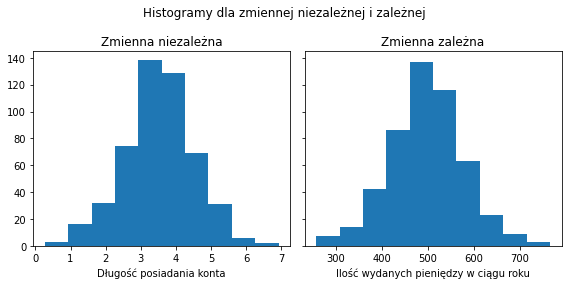

In [7]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4), tight_layout=True)
ax[0].hist(data_x)
ax[0].set_xlabel("Długość posiadania konta")
ax[0].set_title("Zmienna niezależna")
ax[1].hist(data_y)
ax[1].set_xlabel("Ilość wydanych pieniędzy w ciągu roku")
ax[1].set_title("Zmienna zależna")
fig.suptitle("Histogramy dla zmiennej niezależnej i zależnej")

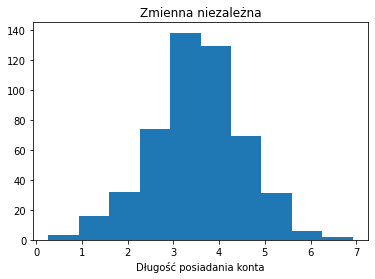

In [8]:
plt.hist(data_x)
plt.xlabel("Długość posiadania konta")
plt.title("Zmienna niezależna")
plt.savefig("1.pdf")

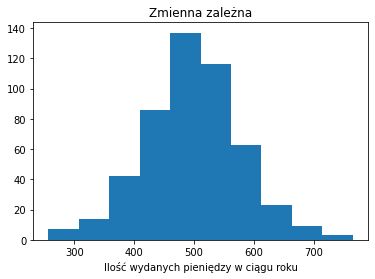

In [9]:
plt.hist(data_y)
plt.xlabel("Ilość wydanych pieniędzy w ciągu roku")
plt.title("Zmienna zależna")
plt.savefig("2.pdf")

Text(0.5, 0.98, 'Wykresy gęstości zmiennej niezależnej i zależnej')

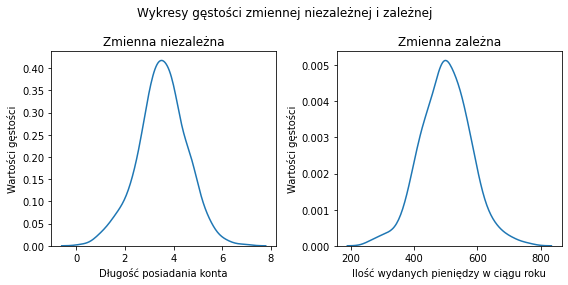

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, tight_layout=True, figsize=(8,4))
sns.kdeplot(ax=ax1, x=data_x)
ax1.set_xlabel("Długość posiadania konta")
ax1.set_ylabel("Wartości gęstości")
ax1.set_title("Zmienna niezależna")
sns.kdeplot(ax=ax2, x=data_y)
ax2.set_xlabel("Ilość wydanych pieniędzy w ciągu roku")
ax2.set_ylabel("Wartości gęstości")
ax2.set_title("Zmienna zależna")
fig.suptitle("Wykresy gęstości zmiennej niezależnej i zależnej")

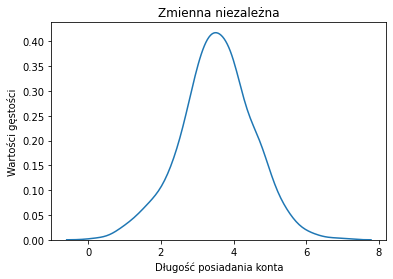

In [11]:
sns.kdeplot(x=data_x)
plt.xlabel("Długość posiadania konta")
plt.ylabel("Wartości gęstości")
plt.title("Zmienna niezależna")
plt.savefig("3.pdf")

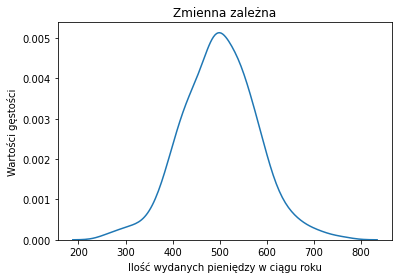

In [12]:
sns.kdeplot(x=data_y)
plt.xlabel("Ilość wydanych pieniędzy w ciągu roku")
plt.ylabel("Wartości gęstości")
plt.title("Zmienna zależna")
plt.savefig("4.pdf")

Text(0.5, 0.98, 'Wykresy dystrybuanty zmiennej niezależnej i zależnej')

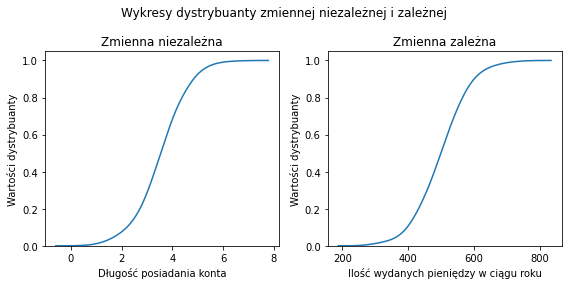

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, tight_layout=True, figsize=(8,4))
sns.kdeplot(ax=ax1, x=data_x, cumulative=True)
ax1.set_xlabel("Długość posiadania konta")
ax1.set_ylabel("Wartości dystrybuanty")
ax1.set_title("Zmienna niezależna")
sns.kdeplot(ax=ax2, x=data_y, cumulative=True)
ax2.set_xlabel("Ilość wydanych pieniędzy w ciągu roku")
ax2.set_ylabel("Wartości dystrybuanty")
ax2.set_title("Zmienna zależna")
fig.suptitle("Wykresy dystrybuanty zmiennej niezależnej i zależnej")

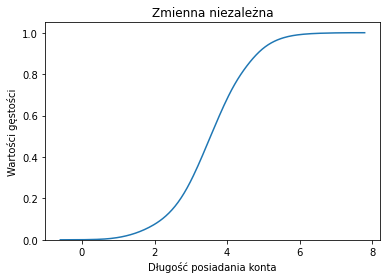

In [14]:
sns.kdeplot(x=data_x, cumulative=True)
plt.xlabel("Długość posiadania konta")
plt.ylabel("Wartości gęstości")
plt.title("Zmienna niezależna")
plt.savefig("5.pdf")

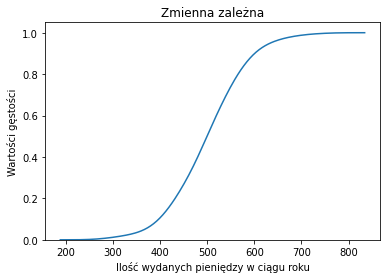

In [15]:
sns.kdeplot(x=data_y, cumulative=True)
plt.xlabel("Ilość wydanych pieniędzy w ciągu roku")
plt.ylabel("Wartości gęstości")
plt.title("Zmienna zależna")
plt.savefig("6.pdf")

Średnia długość posiadania konta = 3.533
Średnia wydanych pieniędzy w ciągu roku = 499.314


Text(0.5, 0.98, 'Wykres pudełkowy zmiennej zależnej i niezależnej')

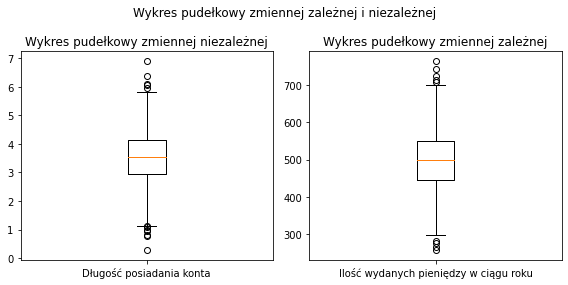

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, tight_layout=True, figsize=(8,4))
ax1.boxplot(data_x, labels=["Długość posiadania konta"])
ax1.set_title("Wykres pudełkowy zmiennej niezależnej")
print(f"Średnia długość posiadania konta = {round(np.mean(data_x),3)}")
ax2.boxplot(data_y, labels=["Ilość wydanych pieniędzy w ciągu roku"])
ax2.set_title("Wykres pudełkowy zmiennej zależnej")
print(f"Średnia wydanych pieniędzy w ciągu roku = {round(np.mean(data_y),3)}")
fig.suptitle("Wykres pudełkowy zmiennej zależnej i niezależnej")

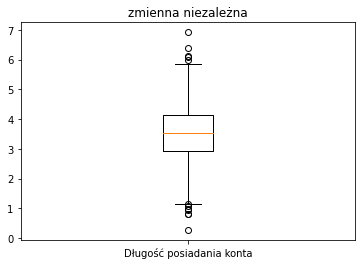

In [17]:
plt.boxplot(data_x, labels=["Długość posiadania konta"])
plt.title("zmienna niezależna")
plt.savefig("7.pdf")

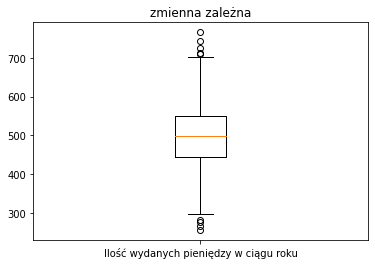

In [18]:
plt.boxplot(data_y, labels=["Ilość wydanych pieniędzy w ciągu roku"])
plt.title("zmienna zależna")
plt.savefig("8.pdf")

Podstawowe miary położenia

In [19]:
df_x_mean = np.mean(data_x)
df_x_gmean = scipy.stats.gmean(data_x)
df_x_hmean = scipy.stats.hmean(data_x)
df_y_mean = np.mean(data_y)
df_y_gmean = scipy.stats.gmean(data_y)
df_y_hmean = scipy.stats.hmean(data_y)
print(f"średnia arytmetyczna długości posiadania konta = {round(df_x_mean, 3)}")
print(f"średnia geometryczna długości posiadania konta = {round(df_x_gmean, 3)}")
print(f"średnia harmoniczna długości posiadania konta = {round(df_x_hmean, 3)}")
print(f"średnia arytmetyczna ilości wydanych pieniędzy w ciągu roku = {round(df_y_mean, 3)}")
print(f"średnia geometryczna ilości wydanych pieniędzy w ciągu roku = {round(df_y_gmean, 3)}")
print(f"średnia harmoniczna ilości wydanych pieniędzy w ciągu roku = {round(df_y_hmean, 3)}")

średnia arytmetyczna długości posiadania konta = 3.533
średnia geometryczna długości posiadania konta = 3.363
średnia harmoniczna długości posiadania konta = 3.113
średnia arytmetyczna ilości wydanych pieniędzy w ciągu roku = 499.314
średnia geometryczna ilości wydanych pieniędzy w ciągu roku = 492.796
średnia harmoniczna ilości wydanych pieniędzy w ciągu roku = 485.93


Podstawowe miary rozproszenia 

In [20]:
data_frame.describe()

,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000
mean,3.533462,499.314038
std,0.999278,79.314782
min,0.269901,256.670582
25%,2.930450,445.038277
50%,3.533975,498.887875
75%,4.126502,549.313828
max,6.922689,765.518462


In [21]:
var_x = np.var(data_x)
var_y = np.var(data_y)
iqr1 = scipy.stats.iqr(data_x, rng=(25,75))
iqr2 = scipy.stats.iqr(data_y, rng=(25,75))
print(f"Wariancja długości posiadania konta = {round(var_x, 3)}")
print(f"Wariancja ilości wydanych pieniędzy w ciągu roku = {round(var_y, 3)}")
print(f"Rozstęp długości posiadania konta = {max(data_x) - min(data_x)}")
print(f"Rozstęp ilości wydanych pieniędzy w ciągu roku = {max(data_y) - min(data_y)}")
print(f"Rozstęp międzykwartylowy długości posiadania konta = {round(iqr1, 3)}")
print(f"Rozstęp międzykwartylowy ilości wydanych pieniędzy w ciągu roku = {round(iqr2, 3)}")



Wariancja długości posiadania konta = 0.997
Wariancja ilości wydanych pieniędzy w ciągu roku = 6278.253
Rozstęp długości posiadania konta = 6.652788245051534
Rozstęp ilości wydanych pieniędzy w ciągu roku = 508.84787964878143
Rozstęp międzykwartylowy długości posiadania konta = 1.196
Rozstęp międzykwartylowy ilości wydanych pieniędzy w ciągu roku = 104.276


Podstawowe miary skośności

In [22]:
sk_x = scipy.stats.skew(data_x)
sk_y = scipy.stats.skew(data_y)
print(f"Współczynnik skośności długości posiadania konta = {round(sk_x,3)}")
print(f"Współczynnik skośności ilości wydanych pieniędzy w ciągu roku = {round(sk_y,3)}")

Współczynnik skośności długości posiadania konta = -0.106
Współczynnik skośności ilości wydanych pieniędzy w ciągu roku = 0.035


Podstawowe miary spłaszczenia 

In [23]:
kur_x = scipy.stats.kurtosis(data_x)
kur_y = scipy.stats.kurtosis(data_y)
eksces_x = kur_x - 3
eksces_y = kur_y - 3 
print(f"Kurtoza długości posiadania konta = {round(kur_x,3)}")
print(f"Kurtoza ilości wydanych pieniędzy w ciągu roku = {round(kur_y,3)}")
print(f"Eksces długości posiadania konta = {round(eksces_x,3)}")
print(f"Eksces ilości wydanych pieniędzy w ciągu roku = {round(eksces_y,3)}")


Kurtoza długości posiadania konta = 0.334
Kurtoza ilości wydanych pieniędzy w ciągu roku = 0.447
Eksces długości posiadania konta = -2.666
Eksces ilości wydanych pieniędzy w ciągu roku = -2.553


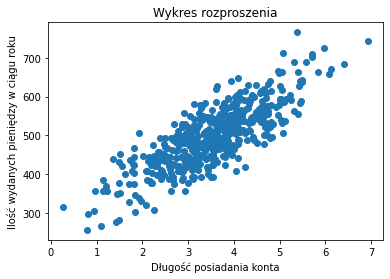

In [24]:
plt.scatter(data_x, data_y)
plt.title("Wykres rozproszenia")
plt.xlabel("Długość posiadania konta")
plt.ylabel("Ilość wydanych pieniędzy w ciągu roku")
plt.savefig("9.pdf")

Funkcję najlepszego dopasowania określamy wzorem:  
64.22 x + 272.4


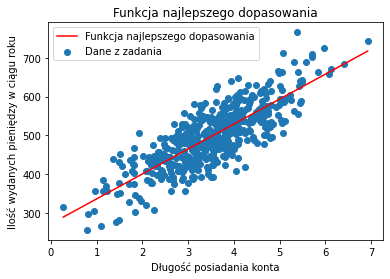

In [25]:
plt.scatter(data_x, data_y, label="Dane z zadania")
plt.title("Funkcja najlepszego dopasowania")
plt.xlabel("Długość posiadania konta")
plt.ylabel("Ilość wydanych pieniędzy w ciągu roku")
coeff = np.polyfit(data_x, data_y, deg=1)
f_n = np.poly1d(coeff)
print(f"Funkcję najlepszego dopasowania określamy wzorem: {f_n}")
plt.plot(np.sort(data_x), np.sort(f_n(data_x)),'r', label="Funkcja najlepszego dopasowania")
plt.legend()
plt.savefig("10.pdf")

In [26]:
N = len(data_x)
x = data_x
b0 = 272.4
b1 = 64.22
beta_est_list1 = []
beta_est_list0 = []

Yi_list = []
Yi_est_list = []
normal = np.random.normal(loc=np.mean(data_x),scale=np.var(data_x), size=N)

for i in range(N):
    Yi = b0 + b1*x[i] + normal[i]
    Yi_list.append(Yi)

Yi_list = np.array(Yi_list)
x = np.array(x)
mY, mx = np.mean(Yi_list), np.mean(x)
beta_est1 = sum(x * (Yi_list - mY)) / (sum((x - mx)**2))
beta_est_list1.append(beta_est1)
beta_est0 = np.mean(Yi_list) - beta_est1*np.mean(x) 
beta_est_list0.append(beta_est0)
Yi_est = beta_est1*x + beta_est0

Ocena poziomu zależności 

In [27]:
pearson = scipy.stats.pearsonr(data_x, data_y)
SSR = sum((Yi_est - mY)**2)
SSE = sum((Yi_list - Yi_est)**2)
SST = SSR + SSE
r2 = SSR/SST
print(f"Współczynnik korelacji pearsona = {round(pearson[0],3)}")
print(f"Suma błędów SSE = {round(SSE,3)}")
print(f"Suma błędów SSR = {round(SSR,3)}")
print(f"Całkowita suma kwadratów = {round(SST,3)}")
print(f"Wspołczynnik determinacji = {r2}")

Współczynnik korelacji pearsona = 0.809
Suma błędów SSE = 521.388
Suma błędów SSR = 2053717.155
Całkowita suma kwadratów = 2054238.542
Wspołczynnik determinacji = 0.9997461893841602


In [28]:
data_x_sort , data_y_sort =zip(*sorted(zip(data_x, data_y)))

In [29]:
def M_N_K(X,Y):
    if len(X)!=len(Y):
        print("error")
        return 'błąd x i y mają różną długość'
    Ga=0
    Da=0
    for i in range(len(X)):
        Ga=Ga+X[i]*(Y[i]-sum(Y)/len(Y))
        Da=Da+X[i]*(X[i]-sum(X)/len(X))
    a=Ga/Da
    b=sum(Y)/len(Y)-a*sum(X)/len(X)
    return (a,b)

In [30]:
(A,B)=M_N_K(data_x,data_y)

In [31]:
(A,B)

(64.21868431558246, 272.3997860580352)

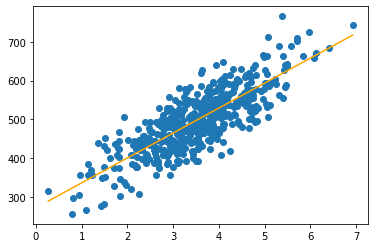

In [33]:
plt.scatter(data_x, data_y)
plt.plot((min(data_x),max(data_x)),(B+A*min(data_x),B+max(data_x)*A),color='orange')

In [34]:
def H_0_A_B_T(X,Y,n=500,q=1.96475):
    (Ae,Be)=M_N_K(X,Y)
    x_=sum(X)/n
    x_2=sum(k**2 for k in X)
    S_2=  sum(     (Y[i]-Ae*X[i]-Be)**2       for i in range(len(X))         )/(n-2) 
    A_ufnosc=(  Ae-q*(  S_2/(x_2-n*x_*x_)  )**(1/2)   ,  Ae+q*(  S_2/(x_2-n*x_*x_)  )**(1/2)  )
    B_ufnosc=(  Be-q*(  (x_2/n)*S_2/(x_2-n*x_*x_)  )**(1/2)  ,  Be+q*(  (x_2/n)*S_2/(x_2-n*x_*x_)  )**(1/2)   )
    return (A_ufnosc,B_ufnosc)

In [35]:
H_0_A_B_T(data_x,data_y)

((60.111808058293356, 68.32556057287158),
 (257.3202731653447, 287.4792989507257))

In [36]:
def estymacja_Y(x_0,X,Y,q=1.96475):
    (Ae,Be)=M_N_K(X,Y)
    n=len(X)
    x_=sum(X)/n
    x_2=sum(k**2 for k in X)
    S_2=  sum(     (Y[i]-Ae*X[i]-Be)**2       for i in range(len(X))         )/(n-2) 
    Y_D= x_0*Ae+Be-q*( S_2*( 1+ (1/n) + ( (x_0-x_)**2 )/(x_2-n*x_*x_)   )   )**(1/2)
    Y_G= x_0*Ae+Be+q*( S_2*( 1+ (1/n) + ( (x_0-x_)**2 )/(x_2-n*x_*x_)   )   )**(1/2)
    return (Y_D,Y_G)

In [37]:
estymacja_Y(7,data_x,data_y)

(629.0667883724677, 814.7943641617571)

In [38]:
cage_G95=[]
cage_D95=[]
cage_G999=[]
cage_D999=[]
for i in data_x_sort:
    (d,g)=estymacja_Y(i,data_x,data_y)
    cage_D95.append(d)
    cage_G95.append(g)
    (D,G)=estymacja_Y(i,data_x,data_y,q=3.3102)
    cage_D999.append(D)
    cage_G999.append(G)

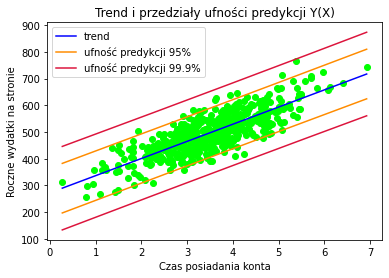

In [39]:
plt.scatter(data_x, data_y,color='lime')
plt.plot((min(data_x),max(data_x)),(B+A*min(data_x),B+max(data_x)*A),color='b')
plt.plot(data_x_sort, cage_G95 ,color='darkorange')
plt.plot(data_x_sort, cage_G999 ,color='crimson')
plt.plot(data_x_sort, cage_D95 ,color='darkorange')
plt.plot(data_x_sort, cage_D999 ,color='crimson')
plt.legend(['trend','ufność predykcji 95%','ufność predykcji 99.9%'])
plt.xlabel('Czas posiadania konta')
plt.ylabel('Roczne wydatki na stronie')
plt.title('Trend i przedziały ufności predykcji Y(X)')
plt.savefig("11.pdf")
# wykres z trendem liniowym purpurową klatką prawdopodobieństwa dla 95 % araz czerwoną dla 99.9 %

In [40]:
residua=[]
for i in range(len(data_x)):
    residua.append(data_y[i]-A*data_x[i]-B)

In [41]:
sum(residua)/len(residua)

-5.323386176314671e-13

In [42]:
r_=sum(residua)/len(residua)

In [43]:
data_x_sort , residua_sort =zip(*sorted(zip(data_x, residua)))

In [44]:
Sr=sum((residua_sort[r] - r_)**2 for r in range(500)   )/(len(residua_sort)-1)

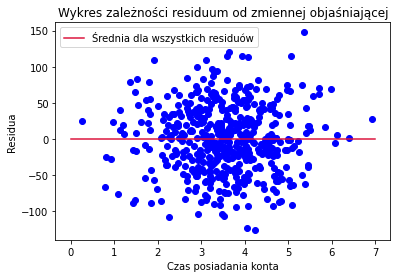

In [45]:
plt.scatter(data_x, residua,color='b')
# residua
plt.plot([0,7],[r_,r_],color='crimson')
plt.legend(['Średnia dla wszystkich residuów'])
plt.xlabel('Czas posiadania konta')
plt.ylabel('Residua')
plt.title('Wykres zależności residuum od zmiennej objaśniającej')
plt.savefig("12.pdf")

In [46]:
v_l=[]
m_l=[]
for k in range(5):
    r_k=sum(   residua_sort[r+k*100] for r in range(100)   )/(len(residua_sort)/5)
    v=sum(   (residua_sort[r+k*100] - r_k)**2 for r in range(100)   )/(len(residua_sort)/5-1)
    v_l.append(v)
    m_l.append(r_k)

In [47]:
v_l

[2010.9203070015383,
 2465.845605836946,
 1922.195891665962,
 2317.3216480863584,
 2216.815212089258]

In [48]:
(v_l[1]-v_l[2])/Sr


0.2502124765201001

In [49]:
m_l


[2.3650472247578462,
 0.7439459221590305,
 -2.058828460606432,
 1.389180579916821,
 -2.43934526622993]

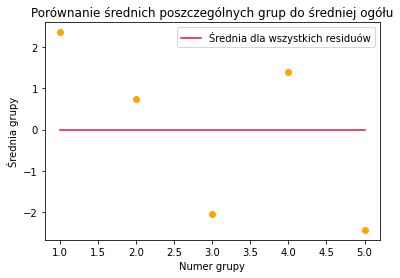

In [50]:
plt.plot([1,5],[r_,r_],color='crimson')
plt.scatter([1,2,3,4,5],m_l,color='orange')
plt.legend(['Średnia dla wszystkich residuów'])
plt.xlabel('Numer grupy')
plt.ylabel('Średnia grupy')
plt.title('Porównanie średnich poszczególnych grup do średniej ogółu')
plt.savefig("13.pdf")
# średnie w podprzedziałach

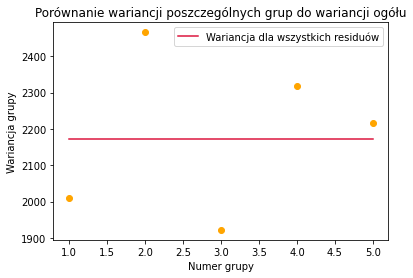

In [51]:
plt.plot([1,5],[Sr,Sr],color='crimson')
plt.scatter([1,2,3,4,5],v_l,color='orange')
plt.legend(['Wariancja dla wszystkich residuów'])
plt.xlabel('Numer grupy')
plt.ylabel('Wariancja grupy')
plt.title('Porównanie wariancji poszczególnych grup do wariancji ogółu')
plt.savefig("14.pdf")
# wariancje w podprzedziałach

In [53]:
S_2_r=sum((r - r_)**2 for r in residua   )/(len(residua)-1)

In [54]:
residua_normalise=[]
for r in residua:
    residua_normalise.append(r/(3*S_2_r**(1/2)))

In [55]:
def emp_covar(X,h=0):
    n=len(X)
    X_=sum(X)/n
    cov=sum(   (X[i]-X_)*(X[i+h]-X_) for i in range(n-h)   )/n
    return cov

In [56]:
cor_l=[]
for h in range(len(residua)):
    cor_l.append(emp_covar(residua,h)/emp_covar(residua))

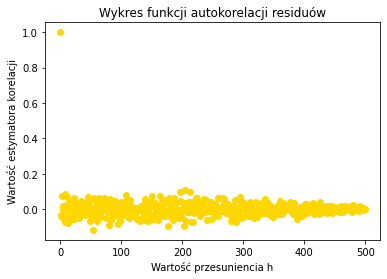

In [57]:
plt.scatter(range(500),cor_l,color='gold')
plt.xlabel('Wartość przesuniencia h')
plt.ylabel('Wartość estymatora korelacji')
plt.title('Wykres funkcji autokorelacji residuów')
plt.savefig("15.pdf")
# funkcja autocowaariancji

In [58]:
len(cor_l)

500

In [59]:
residua_sort_normalize=[]
for i in residua_sort:
    residua_sort_normalize.append((i-r_)/S_2_r**(1/2))
residua_sort_normalize.sort()
residua_sort_normalize=np.array(residua_sort_normalize)  

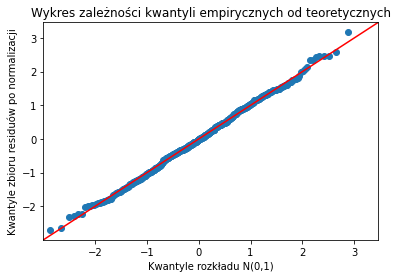

In [60]:
fig = sm.qqplot(residua_sort_normalize, line='45')
plt.xlabel('Kwantyle rozkładu N(0,1)')
plt.ylabel('Kwantyle zbioru residuów po normalizacji')
plt.title('Wykres zależności kwantyli empirycznych od teoretycznych')
plt.show()
fig.savefig("16.pdf")

In [61]:
0.999**500


0.6063789448611847

In [62]:
F=[]
for q in residua_sort_normalize:
    F.append(norm.cdf(q))

In [63]:
SUP=0
for i in range(len(F)):
    if abs(F[i]-i/len(F))>SUP:
        SUP=abs(F[i]-i/len(F))
    if abs(F[i]-(i+1)/len(F))>SUP:
        SUP=abs(F[i]-(i+1)/len(F))
        

In [64]:
SUP


0.020887507394350857

In [65]:
1.36/500**(1/2)

0.06082104898799428

In [66]:
F[-10:-1]

[0.9808956661833674,
 0.9833516872109563,
 0.9903608172222365,
 0.9903862829261194,
 0.992486813638037,
 0.9930333873406363,
 0.9931400308341843,
 0.993339132778307,
 0.9950493371533097]